# 🦠 COVID-19 Project

<div style="display: flex; gap: 10px;">
  <img src="https://media.giphy.com/media/v1.Y2lkPTc5MGI3NjExcXJvamdsbWEzNmVsbWExb3lkcnZnMnFiN3o5aHI2dGs2OHlibGRtcyZlcD12MV9zdGlja2Vyc19zZWFyY2gmY3Q9cw/LnpF27wlTv6yoQV4mL/giphy.gif" alt="Coronavirus Animation" width="350">
</div>


In [1]:
# تحديث النظام + تثبيت Google Chrome
!apt-get update -qq
!apt-get install -y google-chrome-stable

# تثبيت الإصدارات المناسبة من plotly و kaleido
!pip install -U plotly==6.1.1 kaleido==0.2.1

W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
E: Unable to locate package google-chrome-stable


In [2]:
#!pip install ydata_profiling
import pandas as pd
from ydata_profiling import ProfileReport

In [3]:
df=pd.read_csv(r"/content/WHO-COVID-19-global-daily-data(1).csv")
profile=ProfileReport(df,title="Profiling Report")
#profile

In [4]:
df.head()

,Date_reported,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
0,2020-01-04,AI,Anguilla,AMR,NaN,0,NaN,0
1,2020-01-04,AZ,Azerbaijan,EUR,NaN,0,NaN,0
2,2020-01-04,BD,Bangladesh,SEAR,0.0,0,0.0,0
3,2020-01-04,BB,Barbados,AMR,NaN,0,NaN,0
4,2020-01-04,BR,Brazil,AMR,NaN,0,NaN,0


In [5]:
df.columns= df.columns.str.lower()

In [6]:
all(column == column.lower() for column in df.columns)

True

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 491040 entries, 0 to 491039
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   date_reported      491040 non-null  object 
 1   country_code       488994 non-null  object 
 2   country            491040 non-null  object 
 3   who_region         491040 non-null  object 
 4   new_cases          210491 non-null  float64
 5   cumulative_cases   491040 non-null  int64  
 6   new_deaths         154004 non-null  float64
 7   cumulative_deaths  491040 non-null  int64  
dtypes: float64(2), int64(2), object(4)
memory usage: 30.0+ MB


In [8]:
df.describe()

,new_cases,cumulative_cases,new_deaths,cumulative_deaths
count,2.104910e+05,4.910400e+05,154004.000000,4.910400e+05
mean,3.698457e+03,2.048701e+06,46.102075,2.170254e+04
std,4.854707e+04,8.534154e+06,242.336641,8.689096e+04
min,-6.507900e+04,0.000000e+00,-3520.000000,0.000000e+00
25%,3.000000e+00,6.607000e+03,0.000000,4.000000e+01
50%,6.100000e+01,5.988600e+04,2.000000,6.900000e+02
75%,6.760000e+02,6.611030e+05,15.000000,7.959250e+03
max,6.966046e+06,1.034368e+08,44047.000000,1.226351e+06


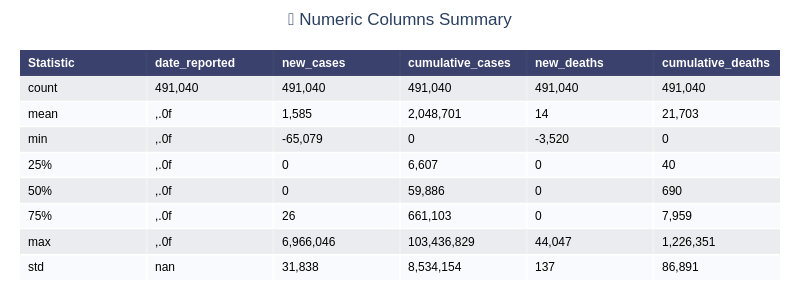

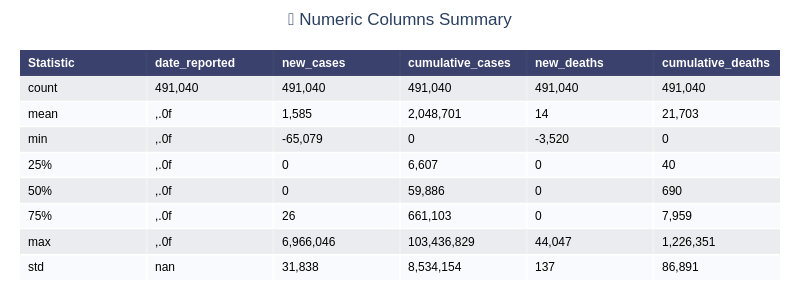

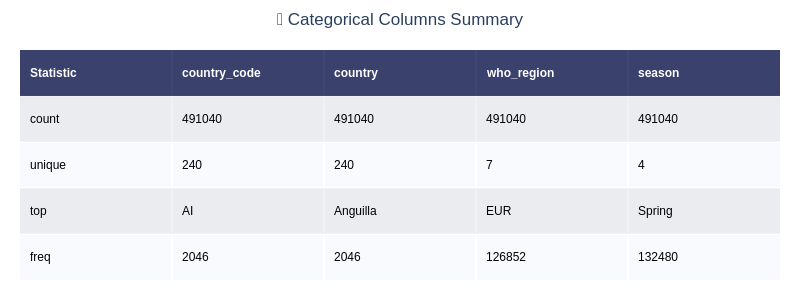

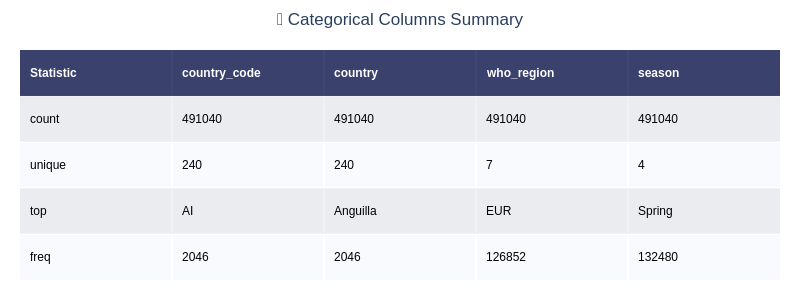

In [29]:
import plotly.figure_factory as ff
import plotly.graph_objects as go
from IPython.display import Image, display

# ----------------------------
# Summary للأعمدة الرقمية
summary_num = df.describe().map(lambda x: f"{x:,.0f}")   # تم التبديل من applymap إلى map
summary_num.insert(0, "Statistic", summary_num.index)  # إضافة عمود labels
fig1 = ff.create_table(summary_num, height_constant=20)
fig1.update_layout(width=800, height=300, margin=dict(l=10, r=10, t=10, b=10))
# إضافة عنوان للجدول
fig1.update_layout(
    title_text="📊 Numeric Columns Summary",
    title_x=0.5,  # توسيط العنوان
    margin=dict(t=50, l=20, r=20, b=20)
)
fig1.show()

# 3️⃣ خزّن نسخة صورة (PNG)
fig1.write_image("plot.png")

# 4️⃣ اعرض الصورة جوه النوتبوك → عشان تبان في GitHub
display(Image("plot.png"))


# ----------------------------
# Summary للأعمدة النصية (Object)
summary_obj = df.describe(include="O")
summary_obj.insert(0, "Statistic", summary_obj.index)  # إضافة عمود labels
fig2 = ff.create_table(summary_obj, height_constant=20)
fig2.update_layout(width=800, height=300, margin=dict(l=10, r=10, t=10, b=10))
# إضافة عنوان للجدول
fig2.update_layout(
    title_text="🔤 Categorical Columns Summary",
    title_x=0.5,  # توسيط العنوان
    margin=dict(t=50, l=20, r=20, b=20)
)
fig2.show()

# 3️⃣ خزّن نسخة صورة (PNG)
fig2.write_image("plot.png")

# 4️⃣ اعرض الصورة جوه النوتبوك → عشان تبان في GitHub
display(Image("plot.png"))

In [10]:
round(df.isna().mean() * 100 ,2)

,0
date_reported,0.00
country_code,0.42
country,0.00
who_region,0.00
new_cases,57.13
cumulative_cases,0.00
new_deaths,68.64
cumulative_deaths,0.00


In [11]:
df.fillna(0, inplace=True)

In [12]:
df.isna().sum()

,0
date_reported,0
country_code,0
country,0
who_region,0
new_cases,0
cumulative_cases,0
new_deaths,0
cumulative_deaths,0


In [13]:
df['date_reported'] = pd.to_datetime(df['date_reported'], errors='coerce')
print(df['date_reported'].dtype)

datetime64[ns]


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 491040 entries, 0 to 491039
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   date_reported      491040 non-null  datetime64[ns]
 1   country_code       491040 non-null  object        
 2   country            491040 non-null  object        
 3   who_region         491040 non-null  object        
 4   new_cases          491040 non-null  float64       
 5   cumulative_cases   491040 non-null  int64         
 6   new_deaths         491040 non-null  float64       
 7   cumulative_deaths  491040 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(2), object(3)
memory usage: 30.0+ MB


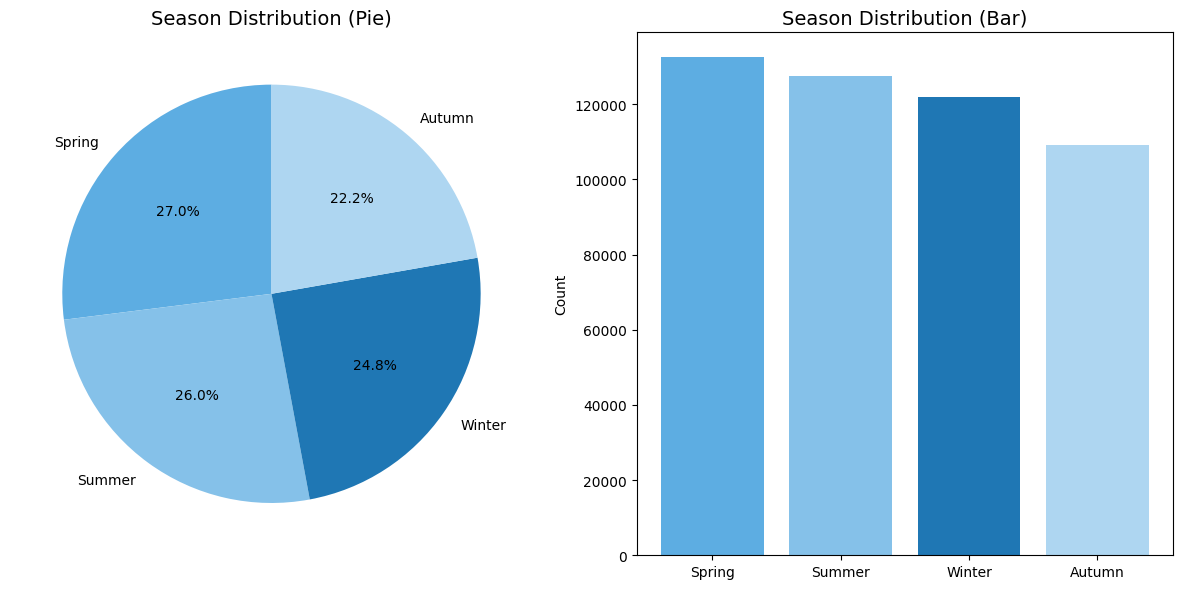

In [30]:
import plotly.graph_objects as go
import plotly.io as pio

# إعداد الـ renderer
pio.renderers.default = "notebook+png"
import matplotlib.pyplot as plt

# ----------------------------
# إنشاء عمود المواسم من التاريخ
def get_season(month):
    if month in [12, 1, 2]:
        return "Winter"
    elif month in [3, 4, 5]:
        return "Spring"
    elif month in [6, 7, 8]:
        return "Summer"
    else:
        return "Autumn"

df["season"] = df["date_reported"].dt.month.map(get_season)

# ----------------------------
# تعريف الألوان لكل موسم (ثابتة)
season_colors = {
    "Winter": "#1f77b4",  # أزرق داكن
    "Spring": "#5dade2",  # أزرق متوسط
    "Summer": "#85c1e9",  # لبني فاتح
    "Autumn": "#aed6f1"   # سماوي أفتح
}

# حساب التوزيع
season_counts = df['season'].value_counts()

# تجهيز الشكل
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Pie chart
axes[0].pie(
    season_counts,
    labels=season_counts.index,
    autopct='%1.1f%%',
    colors=[season_colors[season] for season in season_counts.index],
    startangle=90
)
axes[0].set_title("Season Distribution (Pie)", fontsize=14)

# Bar chart
axes[1].bar(
    season_counts.index,
    season_counts.values,
    color=[season_colors[season] for season in season_counts.index]
)
axes[1].set_title("Season Distribution (Bar)", fontsize=14)
axes[1].set_ylabel("Count")

plt.tight_layout()
plt.savefig("plot.png")   # ← ده اللي يحفظ الصورة
plt.show()


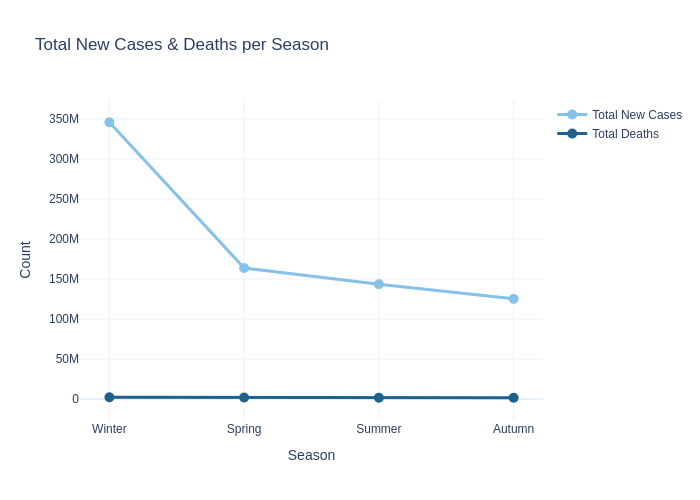

In [34]:
import plotly.graph_objects as go
import plotly.io as pio

# إعداد الـ renderer
pio.renderers.default = "notebook+png"
import plotly.graph_objects as go

# ----------------------------
# حساب الإجماليات لكل موسم
season_summary = df.groupby("season")[["new_cases", "new_deaths"]].sum().reset_index()

# ترتيب المواسم (عشان تظهر بالترتيب الطبيعي)
season_order = ["Winter", "Spring", "Summer", "Autumn"]
season_summary["season"] = pd.Categorical(season_summary["season"], categories=season_order, ordered=True)
season_summary = season_summary.sort_values("season")

# ----------------------------
# إنشاء الشكل
fig = go.Figure()

# رسم Total New Cases
fig.add_trace(go.Scatter(
    x=season_summary['season'],
    y=season_summary['new_cases'],
    mode='lines+markers',
    name='Total New Cases',
    line=dict(color='#85C1E9', width=3),
    marker=dict(size=10)
))

# رسم Total Deaths
fig.add_trace(go.Scatter(
    x=season_summary['season'],
    y=season_summary['new_deaths'],
    mode='lines+markers',
    name='Total Deaths',
    line=dict(color='#1F618D', width=3),
    marker=dict(size=10)
))

# ----------------------------
# إعدادات الشكل
fig.update_layout(
    title='Total New Cases & Deaths per Season',
    xaxis_title='Season',
    yaxis_title='Count',
    template='plotly_white'
)

#fig.show()


# 4️⃣ اعرض الصورة جوه النوتبوك → عشان تبان في GitHub
display(Image("plot.png"))


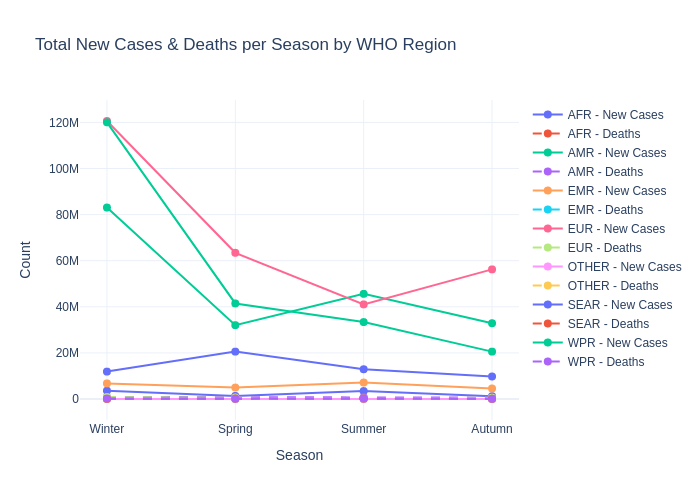

In [37]:
import plotly.graph_objects as go
import plotly.io as pio

# إعداد الـ renderer
pio.renderers.default = "notebook+png"
import plotly.graph_objects as go

# Group by Region and Season
region_season_summary = df.groupby(['who_region','season'])[['new_cases','new_deaths']].sum().reset_index()

# ترتيب المواسم
season_order = ['Winter','Spring','Summer','Autumn']

# إنشاء الشكل
fig = go.Figure()

# لكل Region نضيف خط لكل نوع بيانات
for region in region_season_summary['who_region'].unique():
    df_region = region_season_summary[region_season_summary['who_region'] == region].set_index('season').reindex(season_order)

    # New Cases
    fig.add_trace(go.Scatter(
        x=df_region.index,
        y=df_region['new_cases'],
        mode='lines+markers',
        name=f'{region} - New Cases',
        line=dict(width=2),
        marker=dict(size=8)
    ))

    # Deaths
    fig.add_trace(go.Scatter(
        x=df_region.index,
        y=df_region['new_deaths'],
        mode='lines+markers',
        name=f'{region} - Deaths',
        line=dict(width=2, dash='dash'),  # خط متقطع للوفيات
        marker=dict(size=8)
    ))

# إعداد الشكل
fig.update_layout(
    title='Total New Cases & Deaths per Season by WHO Region',
    xaxis_title='Season',
    yaxis_title='Count',
    template='plotly_white'
)


# 4️⃣ اعرض الصورة جوه النوتبوك → عشان تبان في GitHub
display(Image("plot.png"))